### Ahmad Sayeb
**All questions was answered by me without any help from any sources. Only checked Sklearn library examples for a sample**

In [194]:
import pandas as pd
import numpy as np
#import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, accuracy_score

# importing package
import matplotlib.pyplot as plt

### Question 1

In [207]:
# Loading Iris data set
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [208]:
X = df.loc[:, df.columns!='target']
y = df[['target']]
# dividing the data into 80 and 20 percent
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**In this function we take the defined percentage of the train data and train the model with it. we define four different models and fit those models with the percentage of the train data, logistic regression had to be done with 200 iteration because it would not converge for small set of data (first few iteration which contained very small number of data)**

In [186]:
def train_with_perc(X_train, y_train, perc):
    len_X_perc = int(len(X_train) * perc)
    len_y_perc = int(len(y_train) * perc)
    
    X_train_perc = X_train[: len_X_perc]
    y_train_perc = y_train[: len_y_perc]
    #defining all the models
    #logistic is not converging with 100
    lr = LogisticRegression(max_iter=200)
    dr = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    nb = GaussianNB()
    
    #training models in the data
    lr.fit(X_train_perc, y_train_perc.values.ravel())
    dr.fit(X_train_perc, y_train_perc.values.ravel())
    rf.fit(X_train_perc, y_train_perc.values.ravel())
    nb.fit(X_train_perc, y_train_perc.values.ravel())
    
    return lr, dr, rf, nb

**here we define the percentages and perform the model training for the chosen portion of the data calling the function above. we save each iteration models in a dictionary. we later use this dictionary that models are saved to predict**

In [302]:
models_dict = {}
for i in range(20):
    models_dict[i] = [None,None,None, None]

percentages = []
start_perc = 0.05
percentages.append(start_perc)
for i in range(1,20):
    percentages.append(percentages[i-1] + 0.05)
    
for i in range(len(models_dict.keys())):
    lr, dr, rf, nb = train_with_perc(X_train, y_train, percentages[i])
    models_dict[i] = [lr, dr, rf, nb]

**This function uses the models that were trained with different percentage of train data and predicts values. then calculates the f1_score and accuracy and stores them in a dictionary for different models.**

In [303]:
def f1_and_accuracy_list(models, X_test, y_test):
    lr, dr, rf, nb = models[0], models[1], models[2], models[3]
    lr_predicted = lr.predict(X_test)
    dr_predicted = dr.predict(X_test)
    rf_predicted = rf.predict(X_test)
    nb_predicted = nb.predict(X_test)
    
    f1_score_lr = f1_score(lr_predicted, y_test, average='micro')
    accuracy_score_lr = accuracy_score(lr_predicted, y_test)
    #------------------------------
    f1_score_dr = f1_score(dr_predicted, y_test, average='micro')
    accuracy_score_dr = accuracy_score(dr_predicted, y_test)
    #------------------------------
    f1_score_rf = f1_score(rf_predicted, y_test, average='micro')
    accuracy_score_rf = accuracy_score(rf_predicted, y_test)
    #-------------------------------
    f1_score_nb = f1_score(nb_predicted, y_test, average='micro')
    accuracy_score_nb = accuracy_score(nb_predicted, y_test)
    
    scores_dict = {'lr': (f1_score_lr, accuracy_score_lr), 'dr': (f1_score_dr, accuracy_score_dr), 'rf': (f1_score_rf, accuracy_score_rf), 'nb': (f1_score_nb, accuracy_score_nb)}

    return scores_dict

**Accuracy and f1_score for different model for different iteration has been collected in a dictionary. the dictionary contains all four classifiers as the keys and it has the f1 score and accuracy. f1_score is the first in the tuple and accuracy is the second. for example 'lr': (0.3, 0.5) says that for the first iteration for logistic regression the f1_score is 0.3 and accuracy is 0.5**

In [304]:
lr_f1_scores = []
lr_acc_scores = []
#----------------
dr_f1_scores = []
dr_acc_scores = []
#--------------
rf_f1_scores = []
rf_acc_scores = []
#--------------
nb_f1_scores = []
nb_acc_scores = []
for models in list(models_dict.values()):
    scores_dict = f1_and_accuracy_list(models, X_test, y_test)
    print(scores_dict)
    lr_f1_scores.append(scores_dict['lr'][0])
    lr_acc_scores.append(scores_dict['lr'][1])
    dr_f1_scores.append(scores_dict['dr'][0])
    dr_acc_scores.append(scores_dict['dr'][1])
    rf_f1_scores.append(scores_dict['rf'][0])
    rf_acc_scores.append(scores_dict['rf'][1])
    nb_f1_scores.append(scores_dict['nb'][0])
    nb_acc_scores.append(scores_dict['nb'][1])

{'lr': (0.7333333333333333, 0.7333333333333333), 'dr': (0.36666666666666664, 0.36666666666666664), 'rf': (0.6666666666666666, 0.6666666666666666), 'nb': (0.3333333333333333, 0.3333333333333333)}
{'lr': (0.6666666666666666, 0.6666666666666666), 'dr': (1.0, 1.0), 'rf': (0.9666666666666667, 0.9666666666666667), 'nb': (0.6, 0.6)}
{'lr': (1.0, 1.0), 'dr': (1.0, 1.0), 'rf': (1.0, 1.0), 'nb': (0.9333333333333333, 0.9333333333333333)}
{'lr': (0.9666666666666667, 0.9666666666666667), 'dr': (1.0, 1.0), 'rf': (1.0, 1.0), 'nb': (1.0, 1.0)}
{'lr': (0.9666666666666667, 0.9666666666666667), 'dr': (1.0, 1.0), 'rf': (1.0, 1.0), 'nb': (1.0, 1.0)}
{'lr': (0.9666666666666667, 0.9666666666666667), 'dr': (0.9666666666666667, 0.9666666666666667), 'rf': (1.0, 1.0), 'nb': (1.0, 1.0)}
{'lr': (1.0, 1.0), 'dr': (0.9666666666666667, 0.9666666666666667), 'rf': (1.0, 1.0), 'nb': (1.0, 1.0)}
{'lr': (1.0, 1.0), 'dr': (0.9666666666666667, 0.9666666666666667), 'rf': (0.9666666666666667, 0.9666666666666667), 'nb': (1.0, 

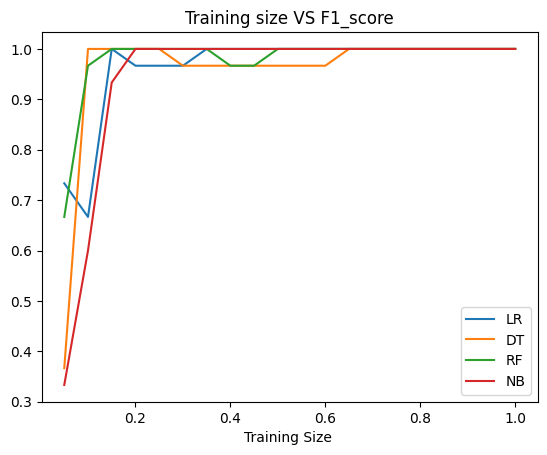

In [306]:
plt.plot(percentages, lr_f1_scores, label='LR')
plt.plot(percentages, dr_f1_scores, label='DT')
plt.plot(percentages, rf_f1_scores, label='RF')
plt.plot(percentages, nb_f1_scores, label='NB')

plt.legend()
plt.xlabel('Training Size ')
plt.title('Training size VS F1_score')
plt.show()

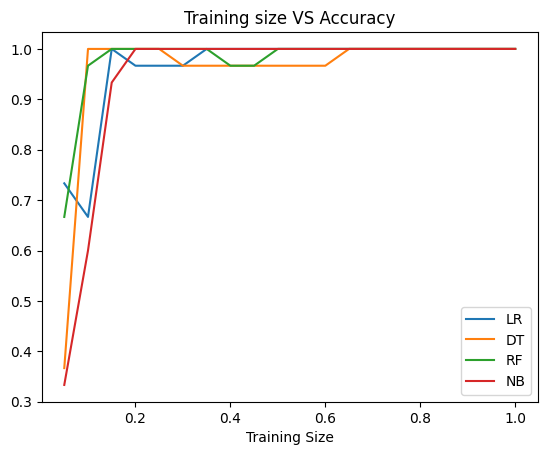

In [307]:
plt.plot(percentages, lr_acc_scores, label='LR')
plt.plot(percentages, dr_acc_scores, label='DT')
plt.plot(percentages, rf_acc_scores, label='RF')
plt.plot(percentages, nb_acc_scores, label='NB')

plt.legend()
plt.xlabel('Training Size')
plt.title('Training size VS Accuracy')
plt.show()

### Question 2

In [287]:
# n = 10
def linear_regression(X, r, N):
    '''This function calculates w1, w0'''
    
    #finding mean this takes into consideration N=10
    r_mean = np.mean(r)
    X_mean = np.mean(X)

    
    #---------------------------
    up_numbers = []
    for i in range(N):
        up_numbers.append(X[i]*r[i])
        
    sum_up = sum(up_numbers)
    
    nominator = sum_up - (X_mean*r_mean*N)
    
    #------------------------------
    down_numbers = []
    for i in range(len(X)):
        down_numbers.append(X[i]*X[i])
    
    sum_down = sum(down_numbers)
    
    denominator = sum_down - (N*X_mean*X_mean)
    
    w1 = nominator/denominator
    w0 = r_mean - w1*X_mean
    
    return w0, w1


def apply_linear(X, w0, w1):
    f_x = []
    for value in X:
        f_x.append(w0 + w1*value)
    
    return f_x


def rmse_calc(f_x, X, N):
    diffs = []
    
    for i in range(len(f_x)):
        diffs.append((f_x[i] - X[i])**2)
    
    sum_diffs = sum(diffs)
    rms = 1/N * sum_diffs
    
    return rms


def mae_calc(f_x, X, N):
    errors = []
    for i in range(N):
        errors.append(abs(f_x[i] - X[i]))
    
    error = np.median(errors)
    return error

In [288]:
X=[-1.4,-1.6,-1.3,0.2,2.0,-1.1,0.0,0.3,-0.9,-1.8]
r=[6.9,7.8,8.0,5.8,1.9,7.3,5.8,5.8,8.2,9.6]

**Calculating w0 and w1 using the function define above**

In [289]:
w0, w1 = linear_regression(X,r, 10)
print('w0, w1:', w0, w1)

w0, w1: 5.768549422336328 -1.6811617458279848


**Calculating the data points using our regression model**

In [290]:
f_x = apply_reg(X, w0,w1)
print(f_x)

[8.122175866495507, 8.458408215661104, 7.954059691912708, 5.432317073170731, 2.406225930680358, 7.617827342747111, 5.768549422336328, 5.264200898587933, 7.281594993581514, 8.7946405648267]


**Calculating rmse using function develped above**

In [291]:
rms = rmse(f_x, X, 10)
print(rms)

61.812806322207955


**Calculating MAE using function developed above**

In [292]:
mae_error = mae(f_x, X,10)
print(mae_error)

8.449711168164313


**Predicting for Z values**

In [235]:
Z=[-0.6,1.8,-0.1,1.1,-1.7]
f_z = apply_reg(Z, w0, w1)
print(f_z)

[6.777246469833119, 2.742458279845955, 5.936665596919126, 3.9192715019255444, 8.626524390243901]


**from left to right in the array f_z1, f_z2, f_z3, f_z4, f_z5**

**Rmse and Mae for the U data**

In [238]:
u=[5.1,-0.2,6.5,2.2,8.3]
print('rmse: ', rmse(f_z, u, 5))
print('mae: ', mae(f_z, u,5))

rmse:  2.970214954730726
mae:  1.6772464698331193


### Question 3

In [241]:
data_dict={(2.0,3.43,4.37):2,(2.49,4.28,4.83):2,(2.58,4.36,4.48):2,(2.66,4.45,5.95):2,
(2.82,3.66,4.51):2,(3.03,4.37,5.07):2,(3.27,4.54,4.57):2,(3.41,3.94,5.35):2,
(3.53,4.32,5.41):2,(3.53,4.6,6.8):1,(3.61,4.25,5.21):1,(3.61,4.78,5.47):1,
(3.72,5.44,5.88):1,(3.87,4.96,4.52):2,(4.13,5.29,6.6):1,(4.25,5.97,5.48):1,
(4.61,4.9,5.11):1,(4.73,4.4,6.78):1,(4.97,4.25,5.0):1,(4.98,5.27,6.79):1,
(5.08,3.51,4.69):3,(5.15,3.58,4.2):3,(5.67,2.27,4.65):3,(5.67,3.81,5.75):3,
(5.94,2.34,4.12):3,(6.06,3.16,4.36):3,(6.09,3.19,4.02):3,(6.43,3.42,4.18):3,
(6.56,2.7,4.03):3,(6.79,3.46,4.81):3}

In [242]:
center_dict = {(3,4,5):1, (4,5,6):2, (6,3,5):3}

In [285]:
def distance_func(single_center, single_point):
    ''' This function calcualtes distance between two sets of array'''
    distances_per_axis = []
    
    products = []
    for i in range(len(single_point)):
        single_dot = single_center[i] * single_point[i]
        products.append(single_dot)
    
    dot_product = sum(products)
    
    abs_lens_a = []
    abs_lens_b = []
    for i in range(len(single_center)):
        abs_lens_a.append(single_center[i]**2)
        abs_lens_b.append(single_point[i]**2)
    
    abs_single_center = (sum(abs_lens_a))**1/2
    abs_single_point = (sum(abs_lens_b))**1/2
    
    nom = dot_product
    denom = abs_single_center * abs_single_point
    
    cos_dist = 1 - (nom/denom)
    
    return cos_dist



def classify(data_dict,  center_dict):
    data_points = list(data_dict.keys())
    center_data = list(center_dict.keys())
    labels = []
    for i in range(len(data_points)):
        dist_center_1 = distance_func(center_data[0], data_points[i])
        dist_center_2 = distance_func(center_data[1], data_points[i])
        data_ceneter_3 = distance_func(center_data[2], data_points[i])
        temp_arr = [dist_center_1, dist_center_2, data_ceneter_3 ]
        print('distances are: ', temp_arr)
        minimum_dist = min(temp_arr)
        print('minimum distance is: ', minimum_dist)
        print('--------------------')
        index = temp_arr.index(minimum_dist)
        label = index+1
        labels.append(label)
    
    return labels

def how_many_correct(predicted, true):
    counter = 0
    
    for i in range(len(predicted)):
        if predicted[i] == true[i]:
            counter += 1
    return counter

In [286]:
predicted_labels = classify(data_dict, center_dict)
true_labels = list(data_dict.values())

distances are:  [0.9046061878617857, 0.9234528501519879, 0.9276490108288811]
minimum distance is:  0.9046061878617857
--------------------
distances are:  [0.9185075887091043, 0.9344886983504755, 0.9379814039753764]
minimum distance is:  0.9185075887091043
--------------------
distances are:  [0.9167752599679905, 0.9329869630111888, 0.9363307999755118]
minimum distance is:  0.9167752599679905
--------------------
distances are:  [0.9286712074064797, 0.9427892974197923, 0.9458120643851032]
minimum distance is:  0.9286712074064797
--------------------
distances are:  [0.9123970629508181, 0.9294202023518063, 0.9308470008741789]
minimum distance is:  0.9123970629508181
--------------------
distances are:  [0.9230568311699859, 0.9380369069176779, 0.9400442840285604]
minimum distance is:  0.9230568311699859
--------------------
distances are:  [0.9220991235768183, 0.9370922661859136, 0.9385863248639981]
minimum distance is:  0.9220991235768183
--------------------
distances are:  [0.92435211

In [284]:
num_true = how_many_correct(predicted_labels, true_labels)
print('number of correctly predicted data ', num_true)

number of correctly predicted data  10
